# HW \#5 (PCA & K-means Clustering)
    
### 제출기한: 2024.05.08

# PCA

## Reference codes for PCA

In [2]:
# load in basic libraries and autograd wrapped numpy
from autograd import numpy as np
import matplotlib.pyplot as plt

def center(X):
    '''
    A function for normalizing each feaure dimension of an input array, mean-centering
    and division by its standard deviation
    
    '''
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_normalized = X - X_means

    return X_normalized

def compute_pcs(X,lam):
    '''
    A function for computing the principal components of an input data matrix.  Both
    principal components and variance parameters (eigenvectors and eigenvalues of XX^T)
    are returned
    '''
    
    # create the correlation matrix
    P = float(X.shape[1])
    Cov = 1/P*np.dot(X,X.T) + lam*np.eye(X.shape[0])

    # use numpy function to compute eigenvalues / vectors of correlation matrix
    D,V = np.linalg.eigh(Cov)
    return D,V

## Dataset

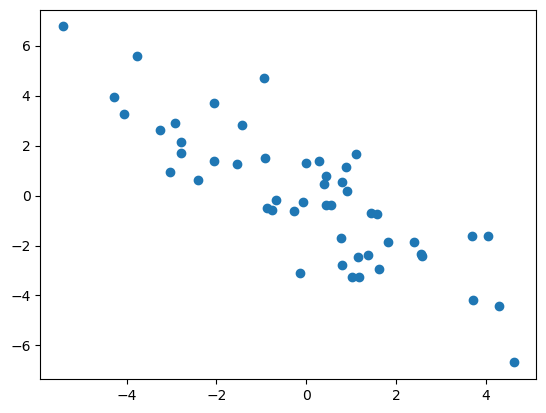

In [5]:
# load in dataset
datapath = './'
X_0 = np.loadtxt(datapath + '2d_span_data.csv',delimiter=',')

# mean-center the data
X = center(X_0)

plt.scatter(X[0],X[1])
plt.show()

### HW  (1)

예제 6.4의 그림 8.7처럼 원데이터를 PCA를 이용해서 인코딩하고 인코딩된 데이터를 그래프에 표시하시오

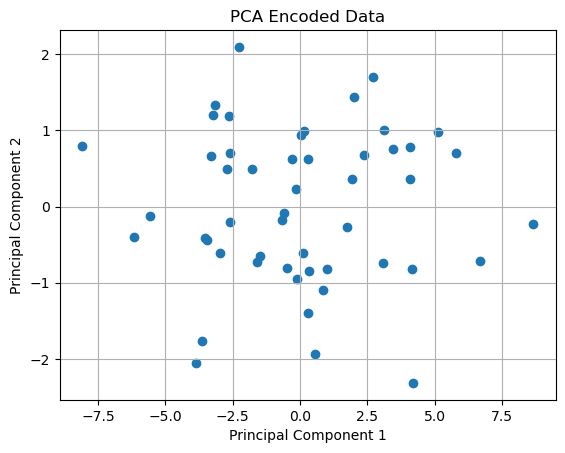

In [6]:
lam = 0.1  # 정규화 파라미터
D, V = compute_pcs(X, lam)

sorted_indices = np.argsort(-D)
V_sorted = V[:, sorted_indices]

Z = np.dot(V_sorted.T, X)

plt.scatter(Z[0], Z[1])
plt.title('PCA Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# K-means Clustering 

## Dataset

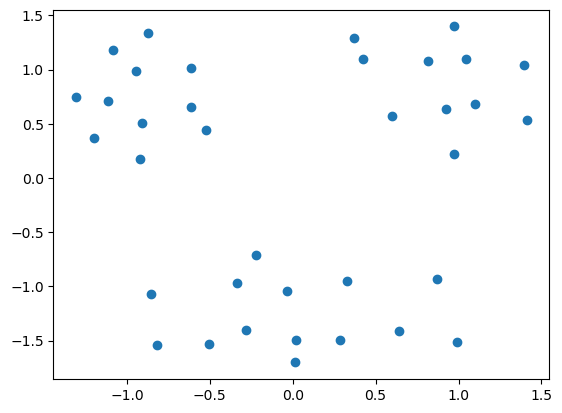

2

In [4]:
# load in dataset
datapath = './'
X_0 = np.loadtxt(datapath + '3cluster_2d_data.csv',delimiter=',')

# mean-center the data
X = center(X_0)

plt.scatter(X[0],X[1])
plt.show()
X.shape[0]

### HW  (2)

위의 데이터셋에 대하여 K-means clustering 알고리즘을 이용해서 K=3 클러스터를 구성하시오. 구성된 결과를 시각화해서 표현하시오.

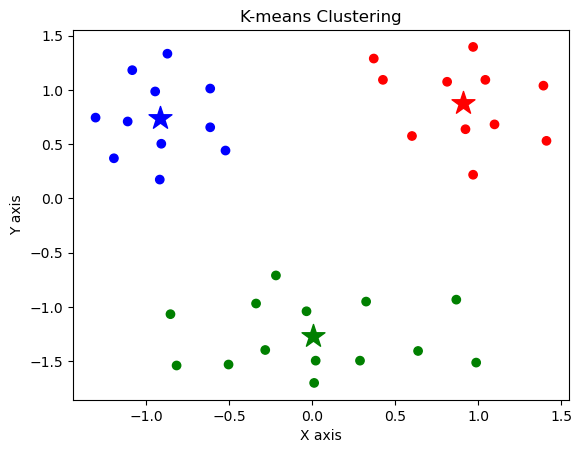

In [5]:
from sklearn.cluster import KMeans
X = X.T
if X.shape[0] >= 3:
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(X)

    colors = ['red', 'green', 'blue']  
    cluster_colors = [colors[label] for label in kmeans.labels_] 
    plt.scatter(X[:, 0], X[:, 1], c=cluster_colors)  
    for i, color in enumerate(colors):
        plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], s=300, c=color, marker='*') 
    plt.title('K-means Clustering')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()
else:
    print("Error: Not enough samples for the number of clusters.")